In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
from syntactic_complexity import analyze_text

In [36]:
initial = analyze_text("O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional. No entanto, a valorização dessas comunidades enfrenta uma série de desafios que vão desde a falta de políticas públicas adequadas até o preconceito arraigado na sociedade. Como ressalta o antropólogo Darcy Ribeiro em sua obra O Povo Brasileiro, a miscigenação é um dos pilares da formação do Brasil, e é nas comunidades tradicionais que encontramos as raízes dessa miscigenação, que devem ser preservadas e valorizadas.")
initial

{'MLC': 16.714285714285715,
 'MLS': 39.0,
 'MLT': 117.0,
 'DCC': 0.8571428571428571,
 'DCT': 6.0,
 'CPC': 1.0,
 'CPT': 7.0,
 'TS': 0.3333333333333333,
 'lexical_density': 0.3504273504273504,
 'lexical_sophistication': 0.8888888888888888,
 'ttr': 0.6788990825688074,
 'd-measure': 124.13919208129512,
 'profundidade_media': 7.0,
 'profundidade_max': 8,
 'token_quantity': 117,
 'text': 'O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional. No entanto, a valorização dessas comunidades enfrenta uma série de desafios que vão desde a falta de políticas públicas adequadas até o preconceito arraigado na sociedade. Como ressalta o antropólogo Darcy Ribeiro em sua obra O Povo Brasileiro, a miscigenação é um dos pilares da formação do Brasil, e é nas comunidades tradicionais que encontramos as raízes dessa miscigenação, que devem ser preservadas e valorizadas.'}

In [37]:
humans = pd.read_json("data/redacoes_humanas.json",lines=True)
humans

title  \
0                                 [redação sem título]   
1                                 [redação sem título]   
2                                 [redação sem título]   
3                                 [redação sem título]   
4                                 [redação sem título]   
..                                                 ...   
510  Raíssa Fontoura 20 anos | São Paulo - SP | @ra...   
511  Ramon Ribeiro 15 anos | Macaúbas - BA | @ramon...   
512         Soﬁa Vale 19 anos | Belém - PA | @soﬁa_lv    
513  Savicevic Ortega 20 anos | Recife - PE | @savi...   
514  Gabriela Traven 17 anos | Manaus - AM | @gabb....   

                                                   url  grade  \
0    https://vestibular.brasilescola.uol.com.br/ban...    600   
1    https://vestibular.brasilescola.uol.com.br/ban...    600   
2    https://vestibular.brasilescola.uol.com.br/ban...    300   
3    https://vestibular.brasilescola.uol.com.br/ban...    300   
4    https://vestibular.brasilescola.uol.com.br/ban...    750   
..                                                 ...    ...   
510                                                      1000   
511                                                      1000   
512                                                      1000   
513                                                      1000   
514                                                      1000   

                                                  text  competencia 1  \
0    No Brasil colonial, para os colonos enviarem c...            150   
1    "Geração Z" é um termo sociólogo para intitula...            150   
2    Algo que pode ser comparado a gente é a obra d...            100   
3    Dos anos noventa até os dias atuais a tecnolog...            100   
4    O computador, criado por Alan Turing, tinha co...            150   
..                                                 ...            ...   
510  De acordo com o ﬁlósofo Platão, a associação e...            200   
511  Promulgada pela ONU em 1948, a Declaração Univ...            200   
512  No livro "O papel de parede amarelo", é narrad...            200   
513  A segunda fase do Modernismo brasileiro teve a...            200   
514  Amai o próximo como a si mesmo." Essa citação,...            200   

     competencia 2  competencia 3  competencia 4  competencia 5  year  \
0              150            100            100            100  2018   
1              150            100            100            100  2018   
2               50             50             50             50  2018   
3               50             50             50             50  2018   
4              150            150            150            150  2018   
..             ...            ...            ...            ...   ...   
510            200            200            200            200  2020   
511            200            200            200            200  2020   
512            200            200            200            200  2020   
513            200            200            200            200  2020   
514            200            200            200            200  2020   

                                                  tema  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
510  O estigma associado às doenças mentais na soci...  
511  O estigma associado às doenças mentais na soci...  
512  O estigma associado às doenças mentais na soci...  
513  O estigma associado às doenças mentais na soci...  
514  O estigma associado às doenças mentais na soci...  

[515 rows x 11 columns]

In [38]:
humans = humans[humans["year"] == 2022]
humans.head()

title  \
257                                 #Princesa redatora   
258                                           09112004   
259                                  11fbs - Enem 2022   
260                                            12/2022   
261  A DESVALORIZAÇÃO DOS POVOS TRADICIONAIS ATUALM...   

                                                   url  grade  \
257  https://vestibular.brasilescola.uol.com.br/ban...    800   
258  https://vestibular.brasilescola.uol.com.br/ban...    800   
259  https://vestibular.brasilescola.uol.com.br/ban...    920   
260  https://vestibular.brasilescola.uol.com.br/ban...    680   
261  https://vestibular.brasilescola.uol.com.br/ban...    760   

                                                  text  competencia 1  \
257  No ano de 1889, o filósofo brasileiro Raimundo...            160   
258  A Constituição federal de 1988 prevê em seu ar...            160   
259  Na obra “Utopia”, do escritor inglês Thomas Mo...            160   
260  Na obra nipônica Calore &amp; Tuesday, marte f...            120   
261  Desde o Brasil Colônia, com a chegada dos port...            160   

     competencia 2  competencia 3  competencia 4  competencia 5  year tema  
257            160            120            200            160  2022  NaN  
258            160            120            200            160  2022  NaN  
259            200            160            200            200  2022  NaN  
260            120            120            160            160  2022  NaN  
261            160            120            200            120  2022  NaN

In [39]:
# data = []
# for i,student in humans.iterrows():
#     row = analyze_text(student["text"])
#     row["type"] = student["grade"] == 1000
#     data.append(row)

In [40]:
# df = pd.DataFrame(data)
# df.head()

In [41]:
# df.to_csv("data/humans.csv",index=False)

In [42]:
import os
import multiprocessing

data = []
directories = [
             "../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo",
             "../Redações/system prompt matias/Enem 2022 Com Texto Motivador/gpt-3.5-turbo",
             "../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-4",
             "../Redações/system prompt matias/Enem 2022 Com Texto Motivador/gpt-4",
             "../Redações/system prompt vazio/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo",
             "../Redações/system prompt vazio/Enem 2022 Com Texto Motivador/gpt-3.5-turbo",
             "../Redações/system prompt vazio/Enem 2022 Sem Texto Motivador/gpt-4",
             "../Redações/system prompt vazio/Enem 2022 Com Texto Motivador/gpt-4"
             ]

def process_file(file_path):
    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        row["type"] = file_path
        print(file_path)

        return row

max_threads = multiprocessing.cpu_count() -1  # You can adjust this number based on your system's capacity

# Use ThreadPoolExecutor to parallelize file processing
with multiprocessing.Pool(processes=max_threads) as pool:
    for directory in directories:
        files = [os.path.join(directory, filename) for filename in os.listdir(directory)]
        results = pool.map(process_file, files)
        data.extend(results)


../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_1.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_14.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_100.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_18.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_12.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_2.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_16.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_10.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_15.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_11.txt
../Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/Igor_13.txt
../Redações/system pro

In [ ]:
machine = pd.DataFrame(data)
machine["type"] = machine["type"].apply(lambda x: "/".join(x.split("/")[2:-1]))
machine.head()

MLC        MLS         MLT       DCC       DCT       CPC        CPT  \
0  16.066667  34.428571   68.857143  0.733333  3.142857  1.900000   8.142857   
1  18.666667  37.333333   62.222222  0.700000  2.333333  2.400000   8.000000   
2  21.434783  35.214286  123.250000  0.652174  3.750000  2.869565  16.500000   
3  15.909091  37.500000   75.000000  0.636364  3.000000  1.696970   8.000000   
4  21.520000  38.428571   76.857143  0.640000  2.285714  2.080000   7.428571   

         TS  lexical_density  lexical_sophistication       ttr   d-measure  \
0  0.500000         0.421162                0.951220  0.527397  133.644276   
1  0.600000         0.391071                0.911111  0.442308  106.516583   
2  0.285714         0.379310                0.967742  0.449889  111.830785   
3  0.500000         0.413333                0.950000  0.466942  115.468015   
4  0.500000         0.364312                0.967742  0.440162  100.586903   

   profundidade_media  profundidade_max  token_quantity  \
0            6.571429                 9             482   
1            7.266667                 9             560   
2            5.785714                 9             493   
3            7.285714                 9             525   
4            6.285714                 9             538   

                                                text  \
0  A valorização de comunidades e povos tradicion...   
1  A história do Brasil é marcada pela presença d...   
2  A valorização das comunidades e povos tradicio...   
3  No Brasil, a diversidade cultural se faz prese...   
4  No cenário nacional, a valorização das comunid...   

                                                type  
0  system prompt matias/Enem 2022 Sem Texto Motiv...  
1  system prompt matias/Enem 2022 Sem Texto Motiv...  
2  system prompt matias/Enem 2022 Sem Texto Motiv...  
3  system prompt matias/Enem 2022 Sem Texto Motiv...  
4  system prompt matias/Enem 2022 Sem Texto Motiv...

In [ ]:
machine.to_csv("data/machines_full.csv",index=False)

In [ ]:
machine["type"] = machine["type"].apply(lambda x: x.split("/")[-1])

In [ ]:
machine["type"].unique()

array(['gpt-3.5-turbo', 'gpt-4'], dtype=object)

In [ ]:
machine.to_csv("data/machines.csv",index=False)

In [ ]:
df = pd.concat([df,machine])

In [ ]:
df.sample(5).head()

MLC        MLS         MLT       DCC       DCT       CPC  \
216  28.928571  33.750000   67.500000  0.714286  1.666667  3.785714   
59   17.068966  38.076923  165.000000  0.586207  5.666667  2.206897   
242  25.545455  28.100000   43.230769  0.818182  1.384615  2.681818   
53   23.608696  38.785714   90.500000  0.695652  2.666667  3.260870   
225  26.571429  34.875000   62.000000  0.714286  1.666667  3.095238   

           CPT        TS  profundidade_media  profundidade_max       ttr  \
216   8.833333  0.500000            6.083333                 7  0.455263   
59   21.333333  0.230769            6.461538                 8  0.477974   
242   4.538462  0.650000            5.350000                10  0.481336   
53   12.500000  0.428571            7.500000                12  0.440711   
225   7.222222  0.562500            6.750000                 8  0.482422   

     lexical_density  lexical_sophistication  token_quantity  \
216         0.412346                0.800000             405   
59          0.400000                0.923077             495   
242         0.409253                0.941176             562   
53          0.397790                0.972973             543   
225         0.376344                0.967742             558   

                                                  text  \
216  Os povos e comunidades tradicionais no Brasil ...   
59   A valorização das comunidades e povos tradicio...   
242  Título: Reconhecimento e Valorização: Um Camin...   
53   No Brasil, a diversidade cultural se manifesta...   
225  Fruto de séculos de diversidade cultural e anc...   

                                                  type  year  
216  ../Redações/Instruções com Cartilha da Redação...   NaN  
59   ../Redações/system prompt matias/Enem 2022 Com...   NaN  
242  ../Redações/Instruções com Cartilha da Redação...   NaN  
53   ../Redações/system prompt matias/Enem 2022 Com...   NaN  
225  ../Redações/Instruções com Cartilha da Redação...   NaN

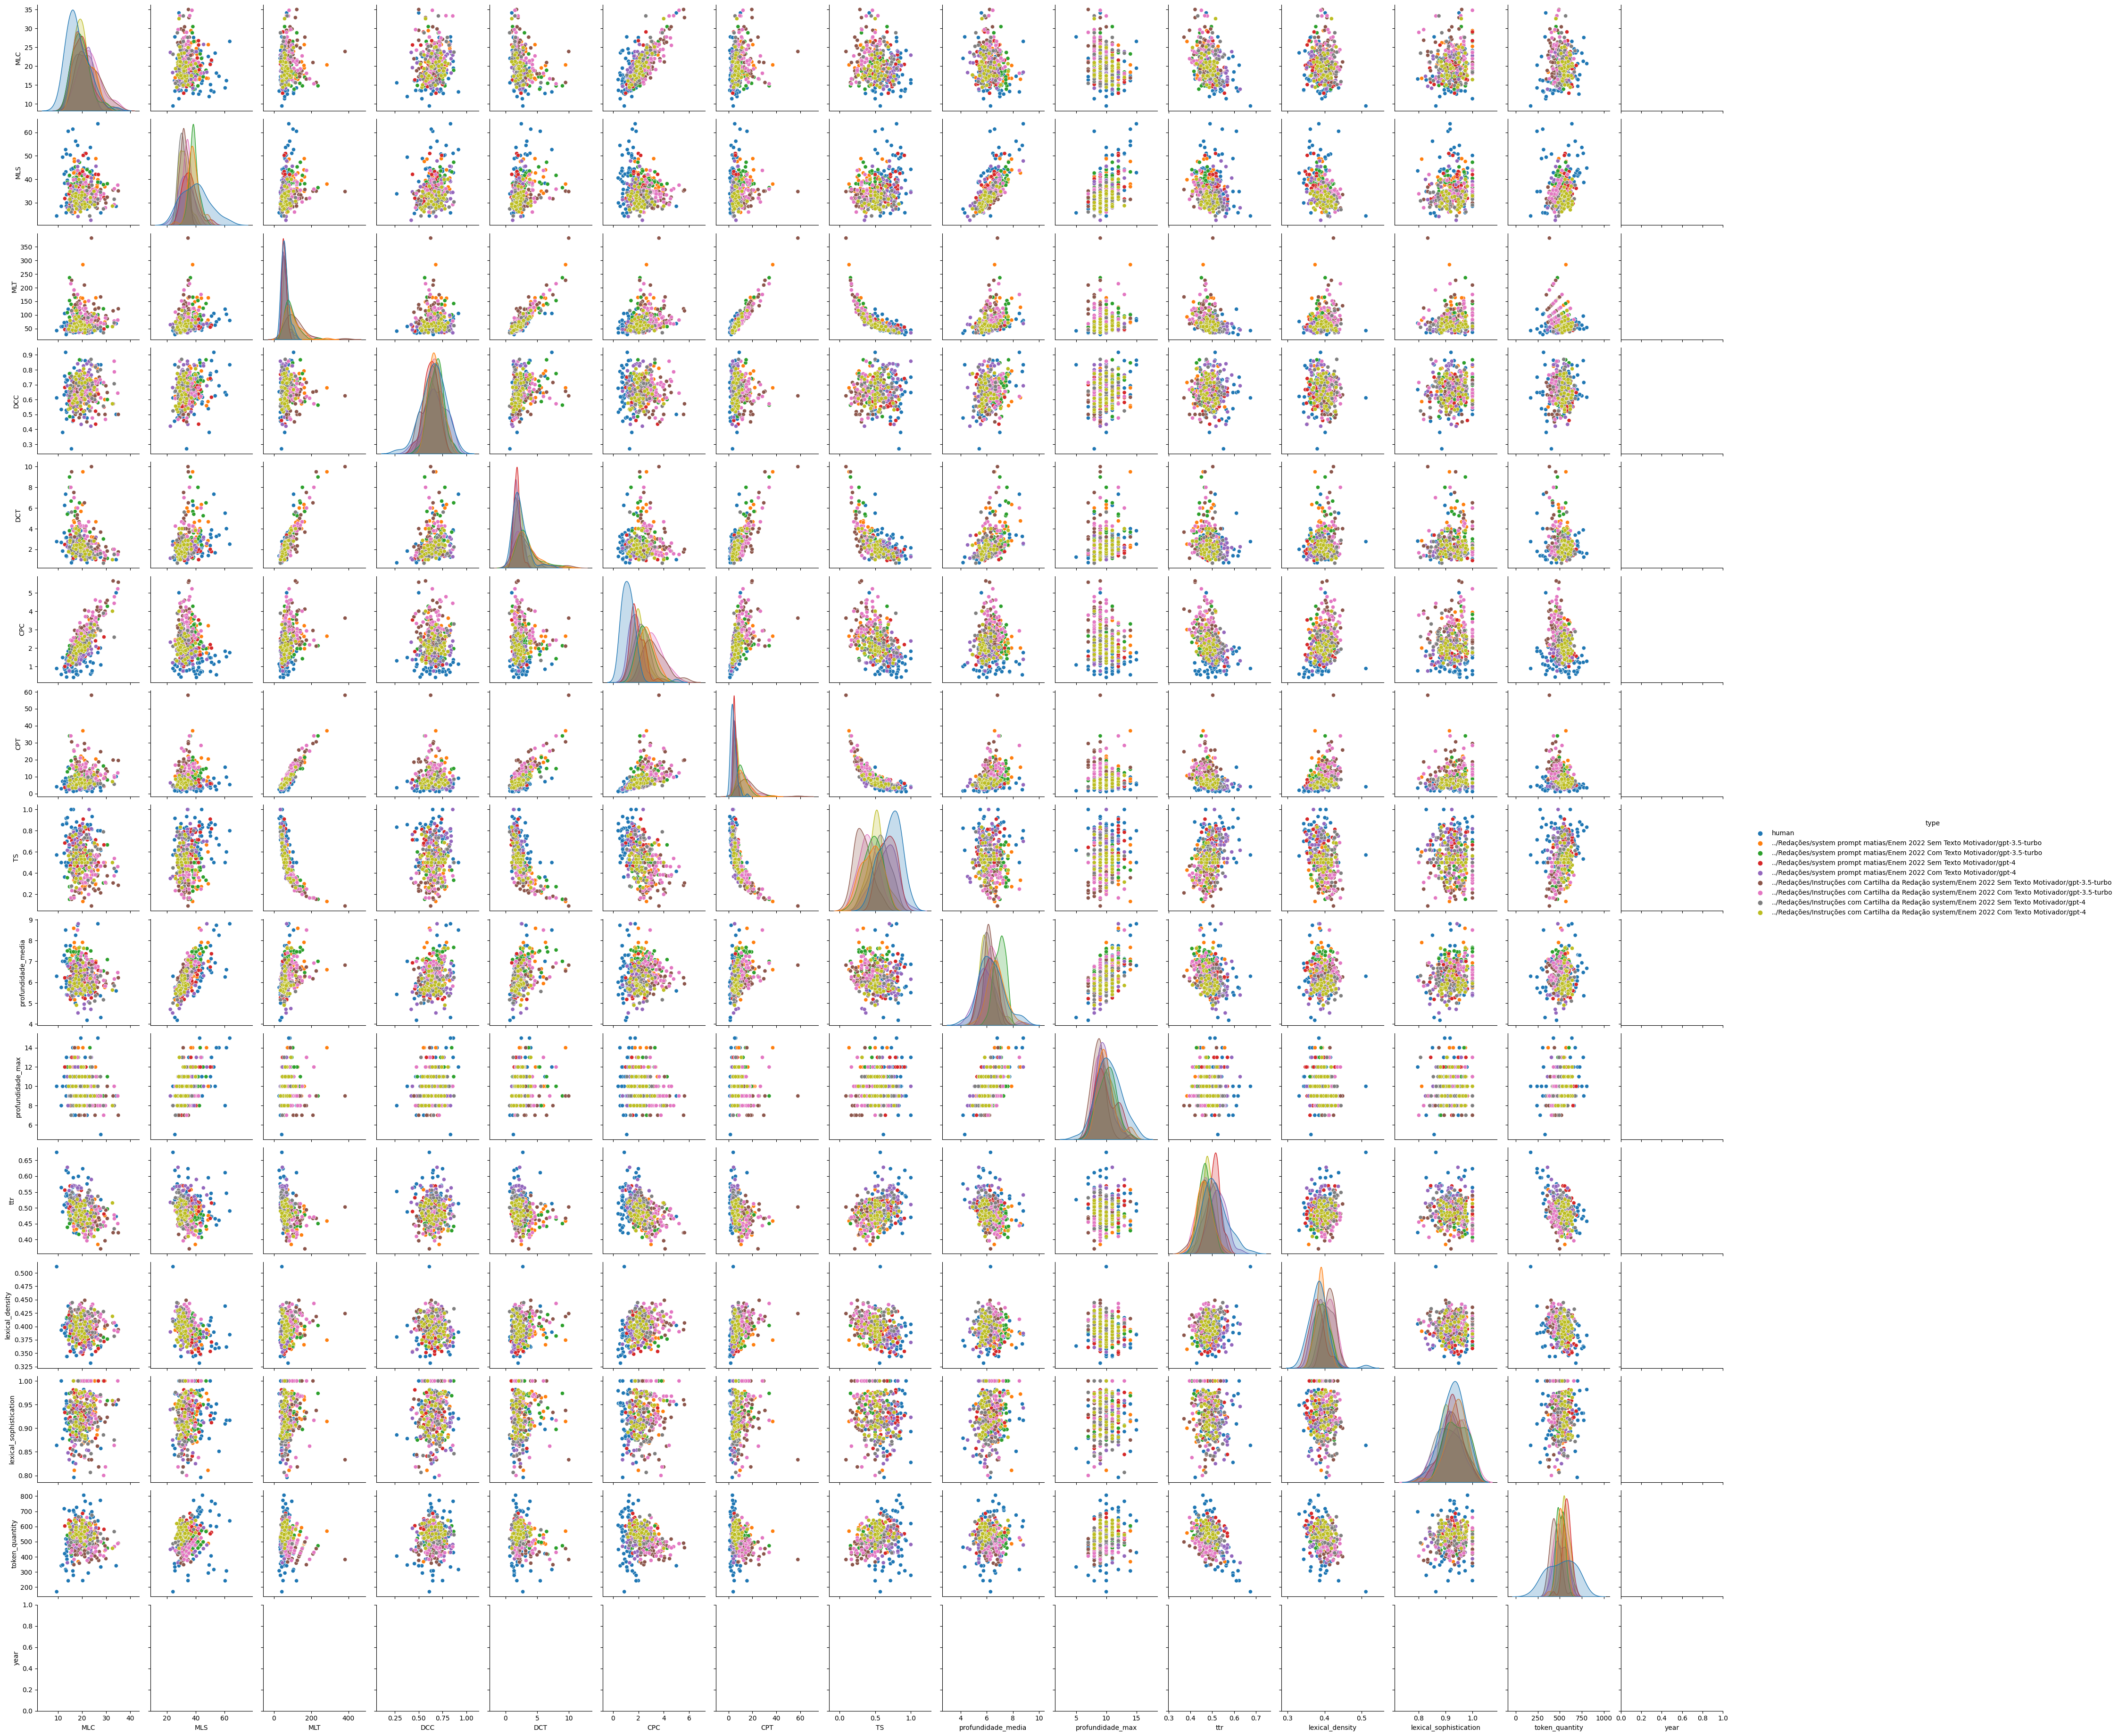

In [ ]:
sns.pairplot(df,hue="type")